# 과제 설명
## 자전거 대여 수 예측

관측 일자 : 2011년 1월 1일 ~ 2012년 12월 19일



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline
plt.style.use("ggplot")
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# Train date = 10,886

In [ ]:
train = pd.read_csv("train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# 데이터 설명
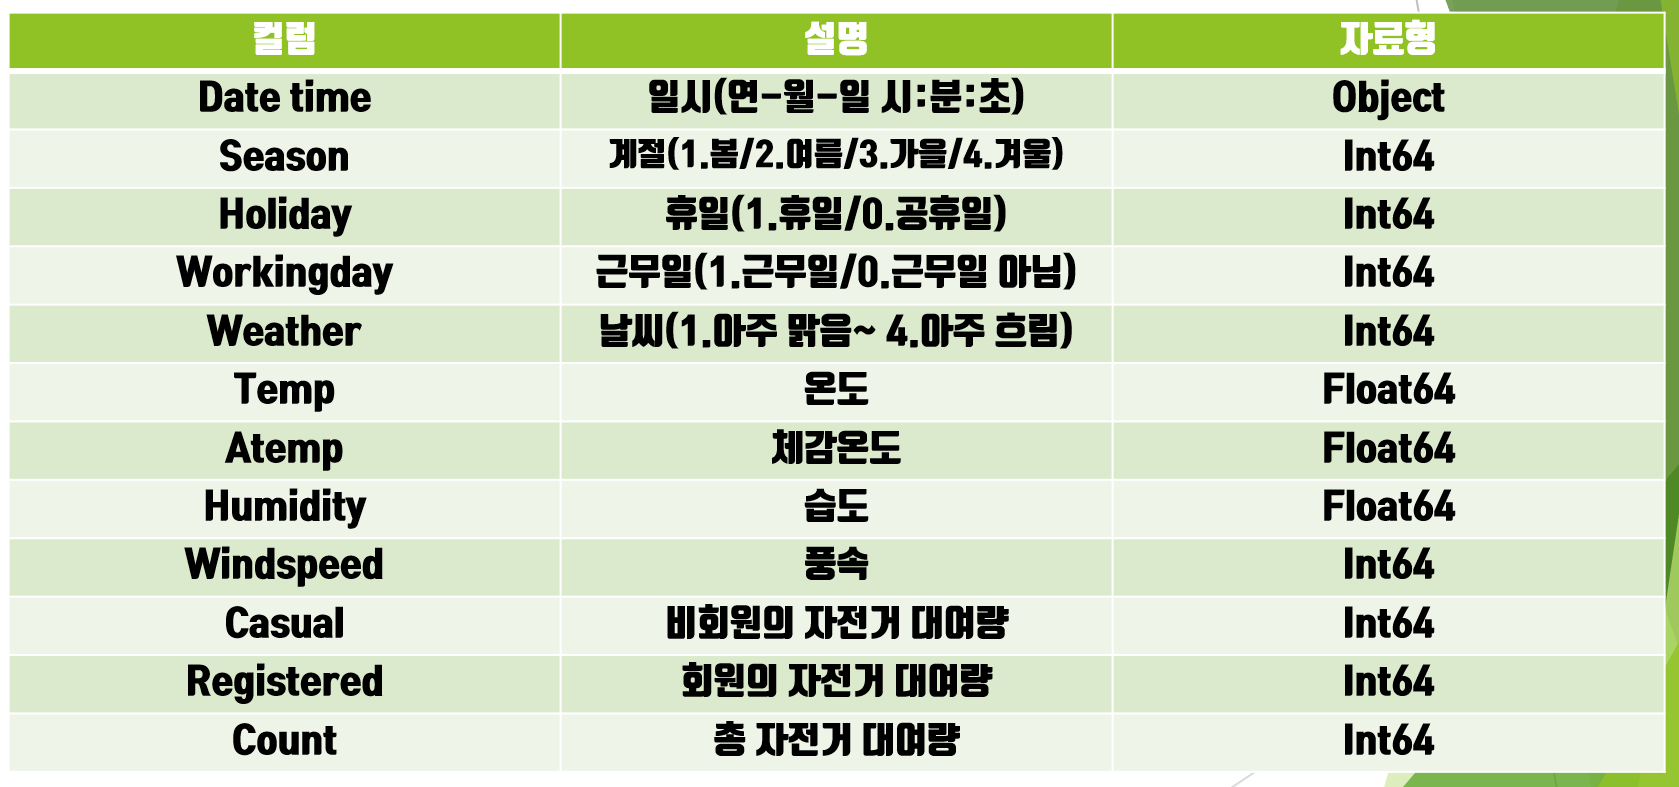

In [ ]:
train["datetime"] = train.datetime.apply(pd.to_datetime)
train["year"] = train.datetime.apply(lambda x : x.year)
train["month"] =train.datetime.apply(lambda x : x.month)
train["day"] = train.datetime.apply(lambda x : x.day)
train["hour"] = train.datetime.apply(lambda x : x.hour)
train["minute"] = train.datetime.apply(lambda x : x.minute)
train["second"] = train.datetime.apply(lambda x : x.second)
train["dayofweek"] = train.datetime.apply(lambda x : x.dayofweek)
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'hour count')]

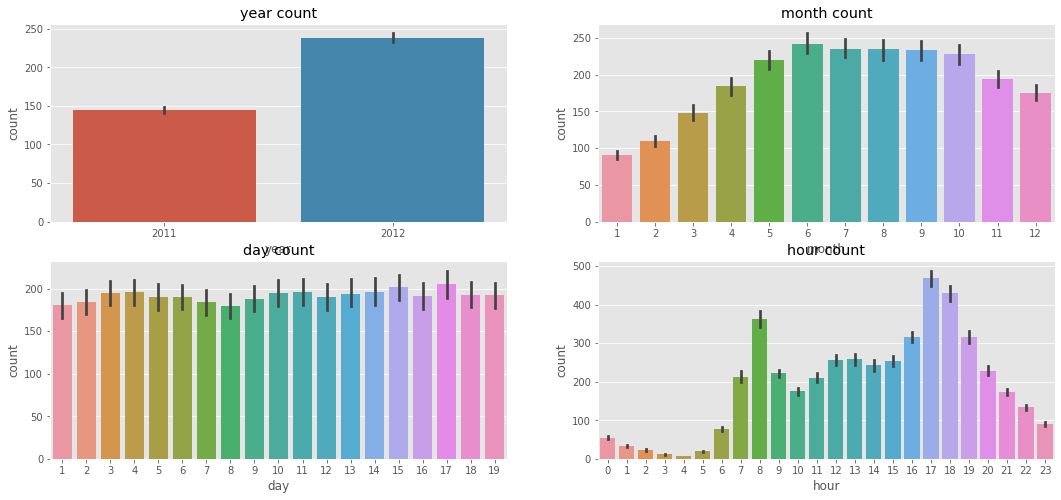

In [ ]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

ax1.set(ylabel='count',title="year count")
ax2.set(xlabel='month',title="month count")
ax3.set(xlabel='day', title="day count")
ax4.set(xlabel='hour', title="hour count")

1. 2012년 평균 자전거 대여량이 더 많다
2. 5월 부터 10월 까지 많이 빌린다
3. 8시와 17시 ~ 18시 사이 가장 많이 빌린다. 이를 보아 출 퇴근 시간대에 가장 많이 빌리는 것을 알 수 있다.

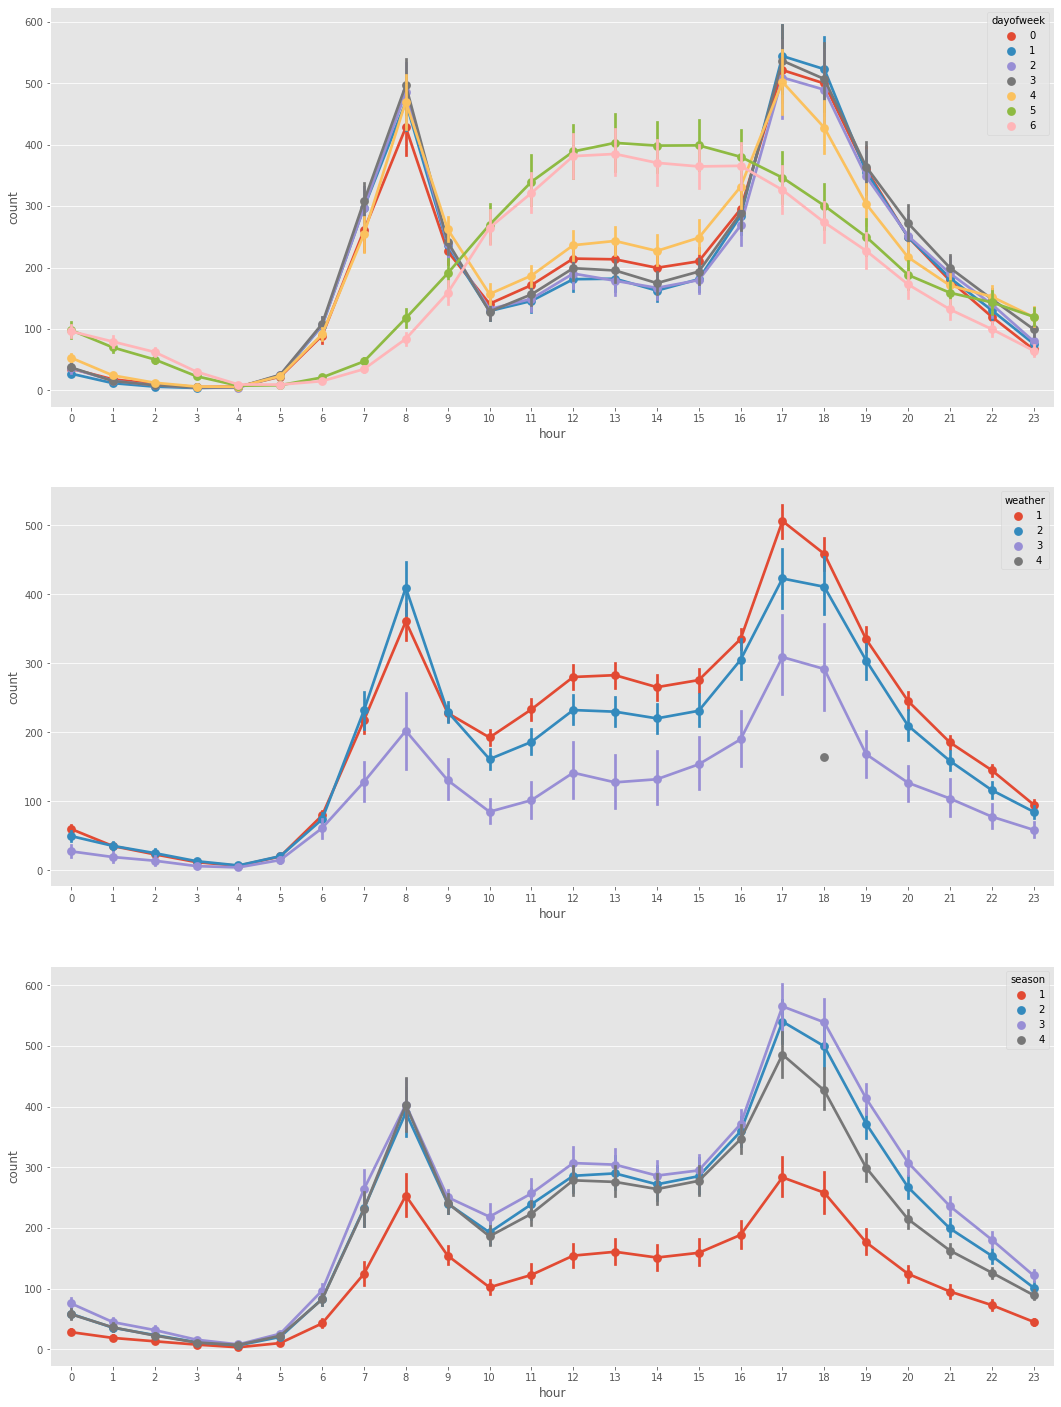

In [ ]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax3)

1. 평일에는 7 ~ 8시, 17 ~ 18시 사이가 높지만 휴일에는 10시 부터 16시 사이가 가장 높다
2. 날씨에 따라 대여량의 차이가 난다. 맑은 날엔 대여량이 많은 편이지만 흐린 날엔 적은 편이다
3. 계절 별로 봤을때 여름과 가을이 가장 높다


In [ ]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


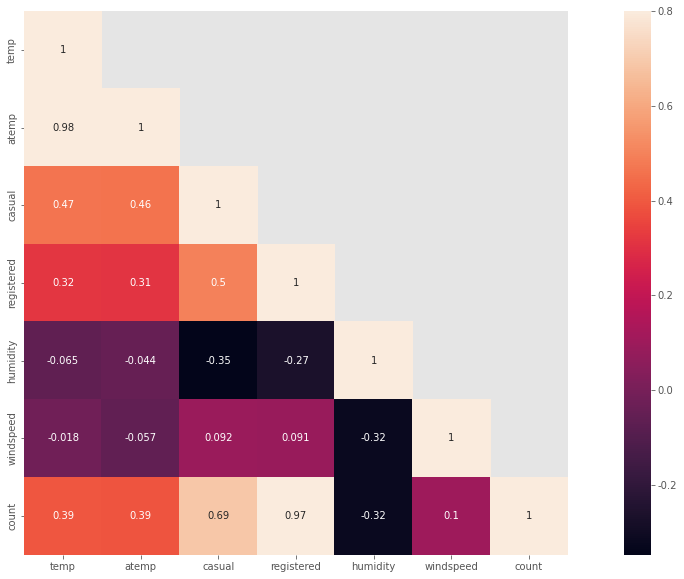

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

1. 온도, 습도, 풍속은 연관관계가 거의 없다.
2. 강한 상관관계 (0.7) 이상을 가지는 변수가 거의 없다.
3. Atemp와 temp는 0.98 로 상관관계가 높지만 피처로 사용하기에 적합하지 않다.

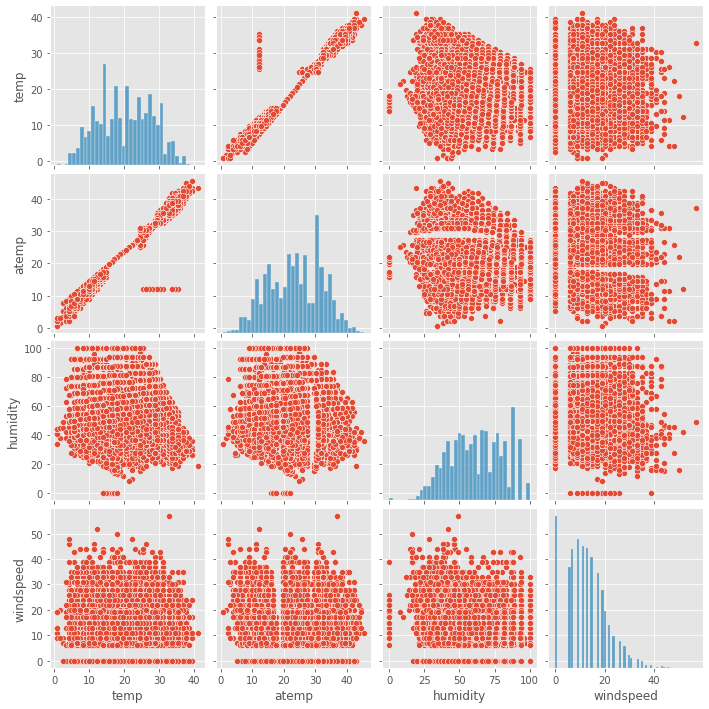

In [ ]:
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed']])

In [ ]:
train[(train.temp > 23)&(train.atemp < 15)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012,8,17,0,0,0,4
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012,8,17,1,0,0,4
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012,8,17,2,0,0,4
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012,8,17,3,0,0,4
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012,8,17,4,0,0,4


1.데이터 확인 결과 온도와 체감온도 사이에서 이상치가 발견됨
2. atemp (체감온도) 에서 동일 값 발견, 문제 해결을 위해 변수 삭제 및 다른 값 대체 

In [ ]:
train[(train.temp > 23)&(train.atemp < 15)].index.sort_values

<bound method Index.sort_values of Int64Index([8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001,
            9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012,
            9013, 9014],
           dtype='int64')>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# Test date = 6,493

In [ ]:
test = pd.read_csv("test.csv")
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
test["datetime"] = test.datetime.apply(pd.to_datetime)
test["year"] = test.datetime.apply(lambda x : x.year)
test["month"] =test.datetime.apply(lambda x : x.month)
test["day"] = test.datetime.apply(lambda x : x.day)
test["hour"] = test.datetime.apply(lambda x : x.hour)
test["minute"] = test.datetime.apply(lambda x : x.minute)
test["second"] = test.datetime.apply(lambda x : x.second)
test["dayofweek"] = test.datetime.apply(lambda x : x.dayofweek)
test.shape

(6493, 16)

# 데이터 정제

In [ ]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names
label_name = "count"

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_test = test[feature_names]
print(X_test.shape)
y_train = train[label_name]
print(y_train.shape)

(10886, 11)
(6493, 11)
(10886,)


# 예측변수 = count
연속형 변수

# 평가척도 = RMSLE
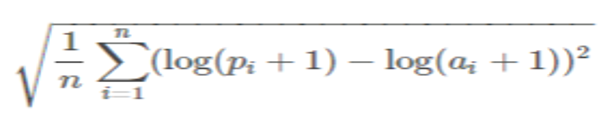

In [ ]:
y_train1 = train["count"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error

In [ ]:
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=50)
y_predict = cross_val_predict(model, X_train, y_train, cv=20)
y_predict[:10]

array([31.74 , 26.1  , 21.276, 12.752,  5.4  ,  3.08 ,  5.36 , 16.06 ,
       51.92 , 93.16 ])

In [ ]:
score = mean_squared_log_error(y_predict, y_train1)
score = np.sqrt(score)
score

0.38159107569841577

RMSLE 값이 0.38로 측정 됨.
이 값이 낮을수록 정확도가 높다고 가정

In [ ]:
df_list = []

for i in range(100):
  max_depth = np.random.randint(2, 101)
  max_features = np.random.uniform(low=0.1, high=1.0)
  model = RandomForestRegressor(n_estimators=50,
                                n_jobs=-1,
                                random_state=50,
                                max_depth=max_depth,
                                max_features=max_features)
  score = mean_squared_log_error(y_predict, y_train1)
  score = np.sqrt(score)

  df = pd.DataFrame({"max_depth": [max_depth], "max_features": [max_features], "score": [score]})
  df_list.append(df)

parameter_df = pd.concat(df_list, axis=0)
parameter_df.sort_values(by="score").head(10)

,max_depth,max_features,score
0,7,0.741224,0.381591
0,41,0.624617,0.381591
0,40,0.841312,0.381591
0,80,0.985895,0.381591
0,19,0.561284,0.381591
0,67,0.395905,0.381591
0,86,0.765435,0.381591
0,75,0.146548,0.381591
0,41,0.598868,0.381591
0,35,0.808421,0.381591


Random Forest 알고리즘 사용, 결과값 예측


In [ ]:
df_list = []

for i in range(50):
  max_depth = np.random.randint(40, 101)
  max_features = np.random.uniform(low=0.7, high=1.0)
  model = RandomForestRegressor(n_estimators=50,
                                n_jobs=-1,
                                random_state=50,
                                max_depth=max_depth,
                                max_features=max_features)
  score = mean_squared_log_error(y_predict, y_train1)
  score = np.sqrt(score)

  df = pd.DataFrame({"max_depth": [max_depth], "max_features": [max_features], "score": [score]})
  df_list.append(df)

parameter_df = pd.concat(df_list, axis=0)
parameter_df.sort_values(by="score").head(10)

,max_depth,max_features,score
0,96,0.603952,0.381591
0,81,0.892872,0.381591
0,99,0.686716,0.381591
0,68,0.824526,0.381591
0,99,0.902770,0.381591
0,89,0.894976,0.381591
0,87,0.698322,0.381591
0,68,0.661993,0.381591
0,82,0.997235,0.381591
0,85,0.933967,0.381591


max_depth 값과 max_features 값의 범위를 변경 후 다시 실행 시켜 봤을 때 더 높은 값이 출력 되며 데이터프레임 4,0,1번째 값이 가장 좋은 하이퍼파라미터라는 것을 알 수 있다

In [ ]:
best_max_depth = parameter_df.sort_values(by="score").iloc[4,0]
best_max_depth

99

In [ ]:
best_max_features = parameter_df.sort_values(by="score").iloc[4,1]
best_max_features

0.9027704370574121

In [ ]:
model = RandomForestRegressor(n_estimators=3000,
                                n_jobs=-1,
                                random_state=50,
                                max_depth=best_max_depth,
                                max_features=best_max_features)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
prediction_test[:10]

array([ 11.85733333,   5.22966667,   3.80025   ,   3.60913889,
         2.98933333,   6.74466667,  38.20066667, 106.09633333,
       237.261     , 135.068     ])

위에서 출력된 max_depth 값과 max_features 값을 best라는 변수에 넣고 n_estimators 값을 최대로 설정하여 출력

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = mean_squared_log_error(y_predict, y_train1)
score = np.sqrt(score)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.38159107569841577


GradientBoostingRegressor 알고리즘을 사용하여 n_estimators 값을 4000으로 설정, alpha 값을 0.01로 하이퍼파라미터를 튜닝 한 후 평가척도를 통해 값을 넣어 본 결과 
RMSEL 값이 0.38정도의 정확도가 나온걸 확인

In [ ]:
preds_test = gbm.predict(X_test)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sampleSubmission.csv to sampleSubmission.csv


In [ ]:
samplesubmission = pd.read_csv("sampleSubmission.csv")

In [ ]:
samplesubmission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
samplesubmission["count"] = np.exp(preds_test)

In [ ]:
samplesubmission.head()

,datetime,count
0,2011-01-20 00:00:00,12.449853
1,2011-01-20 01:00:00,5.658840
2,2011-01-20 02:00:00,3.825399
3,2011-01-20 03:00:00,2.586785
4,2011-01-20 04:00:00,2.281436


In [ ]:
samplesubmission.to_csv('samplesubmission1.csv', index=False)

# 두 파일을 저장 후 비교

In [ ]:
samplesubmission["count"] = prediction_test

In [ ]:
samplesubmission.head()

,datetime,count
0,2011-01-20 00:00:00,11.857333
1,2011-01-20 01:00:00,5.229667
2,2011-01-20 02:00:00,3.800250
3,2011-01-20 03:00:00,3.609139
4,2011-01-20 04:00:00,2.989333


In [ ]:
samplesubmission.to_csv('samplesubmission2.csv', index=False)

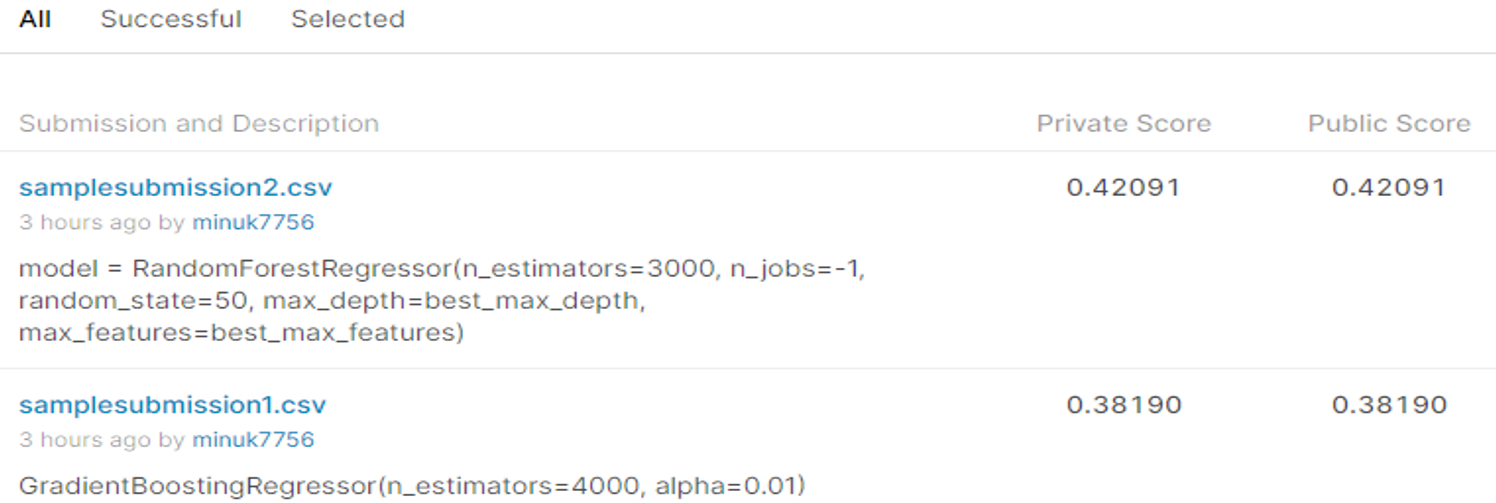

# 결과확인
두 파일을 캐글에 제출 했을때 RandomForest 알고리즘을 쓴 값이 0.42 점이 나오고
GradientBoostingRegressor 알고리즘을 쓴 값이 0.38점 이 나옴
RandomForest 보다 GradientBoostingRegressor 알고리즘이 훨씬 정확한 것을 알 수 있음